In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

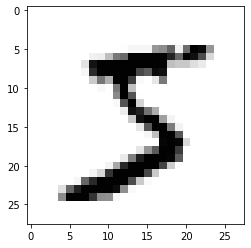

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
len(Y_class_train)

60000

In [8]:
unique, counts = np.unique(Y_class_train, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [9]:
X_test.shape

(10000, 28, 28)

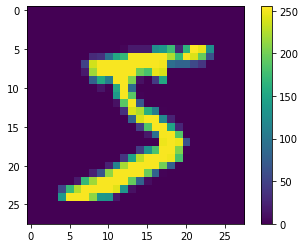

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = X_train / 255.0
test_images = X_test / 255.0

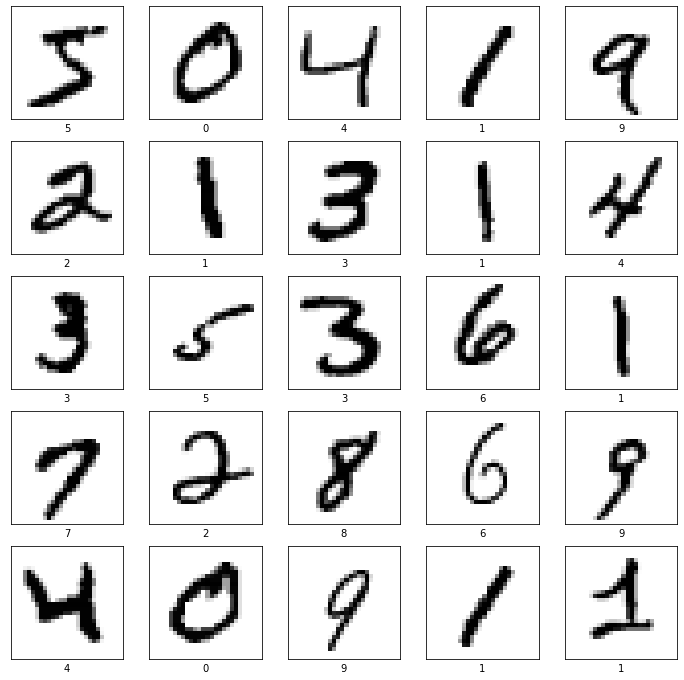

In [12]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_class_train[i]])
plt.show()

In [13]:
X_train = train_images.reshape(-1, 28, 28, 1)
X_test = test_images.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(Y_class_train)
y_test = keras.utils.to_categorical(Y_class_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [14]:
model = keras.Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(keras.layers.Conv2D(filters=64, 
                              kernel_size=2, 
                              padding='same', 
                              activation='relu', 
                              input_shape=(28,28,1))
         )

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten()) # Flatten()은 이미지를 일차원으로 바꿔줍니다.
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [17]:
modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
history = model.fit(X_train, 
                    y_train, 
                    validation_split = 0.2,
                    verbose=0, 
                    batch_size=64, 
                    epochs=30,
                    callbacks=[early_stopping_callback, checkpointer]
                    
                    
                   )


Epoch 00001: val_loss improved from inf to 0.07342, saving model to ./model/mnist01-0.0734.hdf5

Epoch 00002: val_loss improved from 0.07342 to 0.05382, saving model to ./model/mnist02-0.0538.hdf5

Epoch 00003: val_loss improved from 0.05382 to 0.04434, saving model to ./model/mnist03-0.0443.hdf5

Epoch 00004: val_loss did not improve from 0.04434

Epoch 00005: val_loss improved from 0.04434 to 0.04032, saving model to ./model/mnist05-0.0403.hdf5

Epoch 00006: val_loss did not improve from 0.04032

Epoch 00007: val_loss improved from 0.04032 to 0.04032, saving model to ./model/mnist07-0.0403.hdf5

Epoch 00008: val_loss did not improve from 0.04032

Epoch 00009: val_loss improved from 0.04032 to 0.03584, saving model to ./model/mnist09-0.0358.hdf5

Epoch 00010: val_loss improved from 0.03584 to 0.03248, saving model to ./model/mnist10-0.0325.hdf5

Epoch 00011: val_loss improved from 0.03248 to 0.03179, saving model to ./model/mnist11-0.0318.hdf5

Epoch 00012: val_loss improved from 0.0

In [19]:
# from tensorflow.keras.models import load_model
# del model
# model = load_model('model/mnist09-0.0621.hdf5')

In [20]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)
print('\n테스트 정확도:', test_acc)

10000/10000 [==============================] - 3s 319us/sample - loss: 0.0303 - accuracy: 0.9920

테스트 정확도: 0.992
